# DSA210 Project: E-Commerce Pricing Strategies and Their Impact on Sales


**Student:** Mustafa Mervan Temel, 32539  
**University:** Sabancı University  
**Course:** DSA210, Spring 2025

---

## Motivation

In the highly competitive environment of e-commerce, pricing is not just a number—it is a strategic tool that directly influences customer behavior, sales volume, and business profitability.

As the founder of the Popizone store on Trendyol, I observed firsthand how pricing and promotional strategies affected sales. This project aims to transform anecdotal experience into a data-driven pricing strategy using statistical and machine learning methods.


## Project Goal


To quantify and analyze how changes in price, promotions, and visitor traffic influence the sales performance of the **Popizone** online store.

### Key Objectives:
- Determine the impact of pricing and promotions on sales.
- Benchmark against competitors.
- Develop predictive models for sales volume.


## Setup & Data Loading

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Load Data
df = pd.read_excel("ecommerce_30day_data.xlsx")

# Convert Date and Promotion
df['Date'] = pd.to_datetime(df['Date'])
df['Promotion Status'] = df['Promotion Status'].map({'Yes': 1, 'No': 0})

df.head()


,Date,Product Name,Daily Price,Sales Volume,Discount %,Visitor Traffic,Promotion Status,Competitor Price
0,2024-03-01,Saturn Lamp,450.0,5,0%,120,0,332
1,2024-03-02,Saturn Lamp,332.5,7,5%,150,1,329
2,2024-03-03,Saturn Lamp,332.5,6,5%,140,1,333
3,2024-03-04,Saturn Lamp,350.0,4,0%,100,0,338
4,2024-03-05,Saturn Lamp,315.0,8,10%,160,1,329


## Correlation Matrix

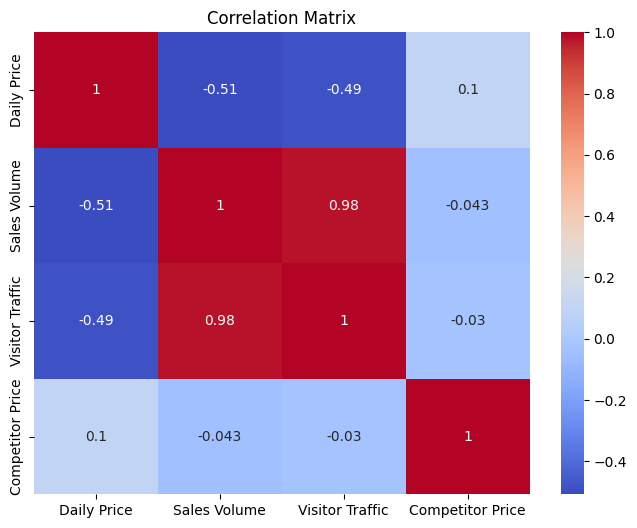

In [3]:

plt.figure(figsize=(8,6))
sns.heatmap(df[['Daily Price', 'Sales Volume', 'Visitor Traffic', 'Competitor Price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Price vs Sales Volume

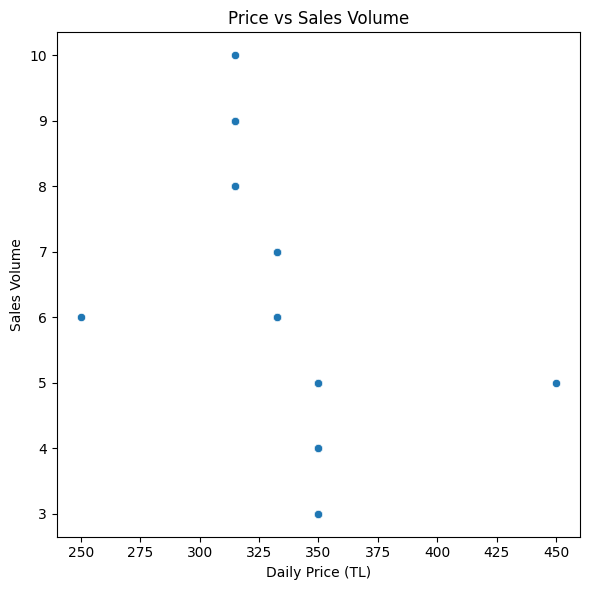

In [4]:

plt.figure(figsize=(6,6))
sns.scatterplot(x='Daily Price', y='Sales Volume', data=df)
plt.title('Price vs Sales Volume')
plt.xlabel('Daily Price (TL)')
plt.ylabel('Sales Volume')
plt.tight_layout()
plt.show()


## Visitor Traffic vs Sales Volume

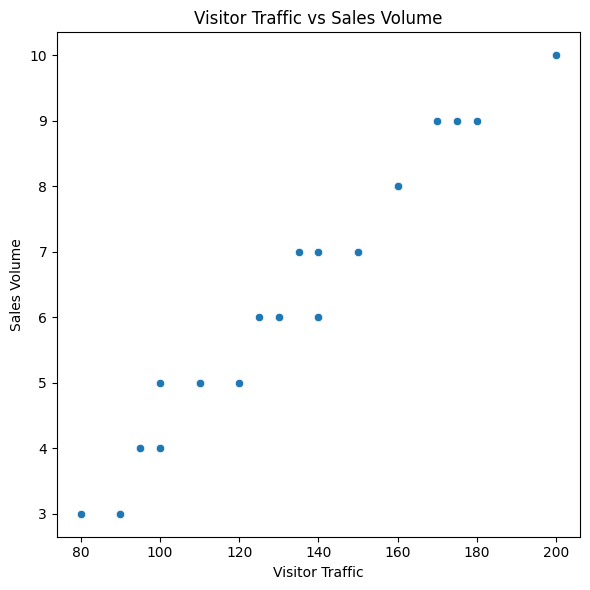

In [5]:

plt.figure(figsize=(6,6))
sns.scatterplot(x='Visitor Traffic', y='Sales Volume', data=df)
plt.title('Visitor Traffic vs Sales Volume')
plt.xlabel('Visitor Traffic')
plt.ylabel('Sales Volume')
plt.tight_layout()
plt.show()


## Price Change Over Time

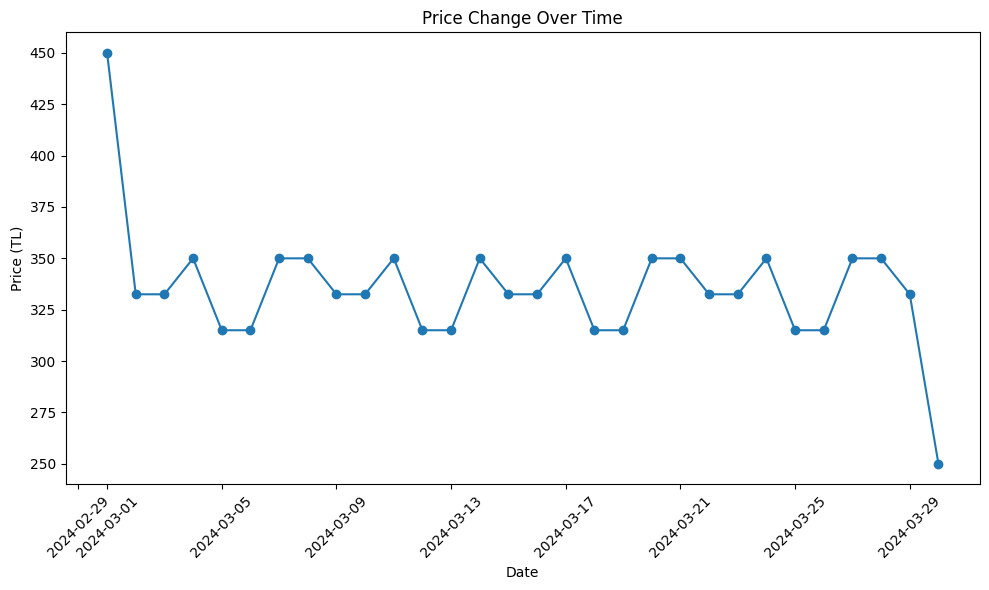

In [6]:

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Daily Price'], marker='o')
plt.title('Price Change Over Time')
plt.xlabel('Date')
plt.ylabel('Price (TL)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Sales Change Over Time

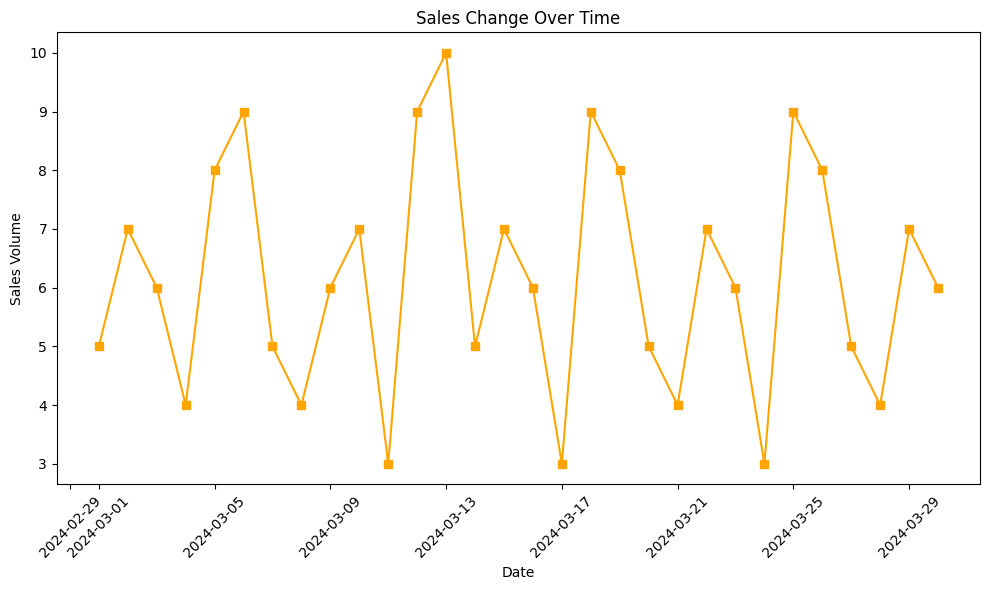

In [7]:

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Sales Volume'], marker='s', color='orange')
plt.title('Sales Change Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Competitor Price vs Sales Volume

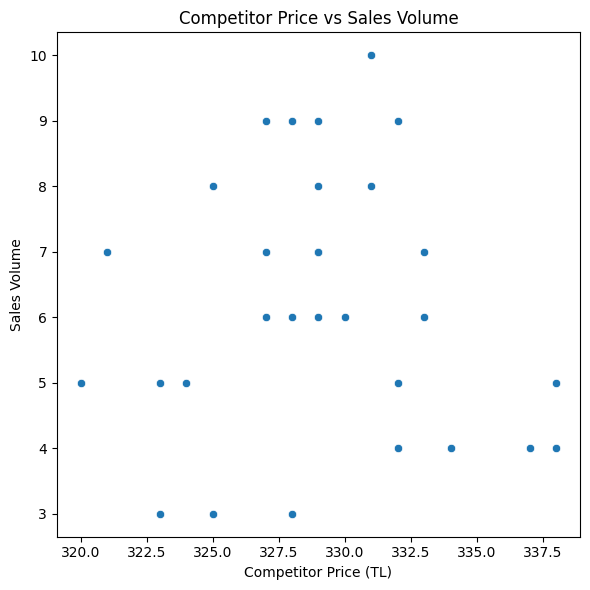

In [8]:

plt.figure(figsize=(6,6))
sns.scatterplot(x='Competitor Price', y='Sales Volume', data=df)
plt.title('Competitor Price vs Sales Volume')
plt.xlabel('Competitor Price (TL)')
plt.ylabel('Sales Volume')
plt.tight_layout()
plt.show()


## Promotion Impact on Sales (T-Test)

In [9]:

promo_sales = df[df['Promotion Status'] == 1]['Sales Volume']
no_promo_sales = df[df['Promotion Status'] == 0]['Sales Volume']
t_stat, p_val = ttest_ind(promo_sales, no_promo_sales)

print("T-Statistic:", t_stat)
print("P-Value:", p_val)
if p_val < 0.05:
    print("✅ Promotions significantly increased sales.")
else:
    print("❌ No significant difference due to promotions.")


T-Statistic: 7.869910029407436
P-Value: 1.4266824145816323e-08
✅ Promotions significantly increased sales.


## Machine Learning Models

We apply four different models to predict **Sales Volume**.

### Model 1: Linear Regression (Daily Price)

R²: 0.2758726256388986
MAE: 1.3536110196465805


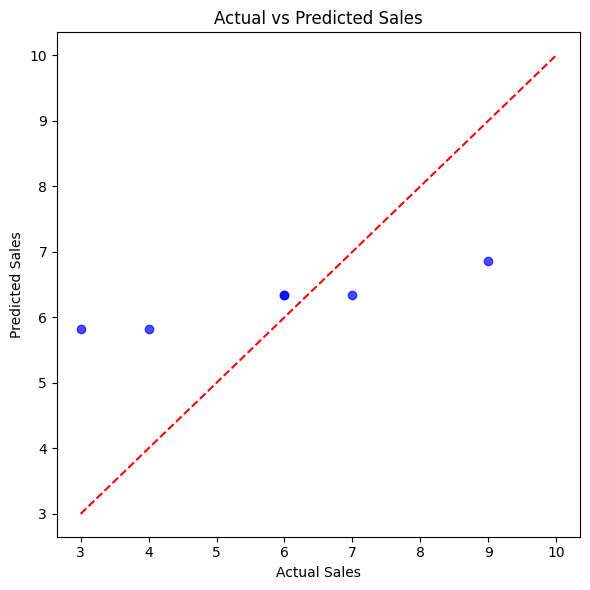

In [10]:

X = df[['Daily Price']]
y = df['Sales Volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

if len(X.columns) == 1:
    model = LinearRegression()
else:
    model = DecisionTreeRegressor(random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.tight_layout()
plt.show()


### Model 2: Linear Regression (Visitor Traffic)

R²: 0.9425114159419933
MAE: 0.41424316622993534


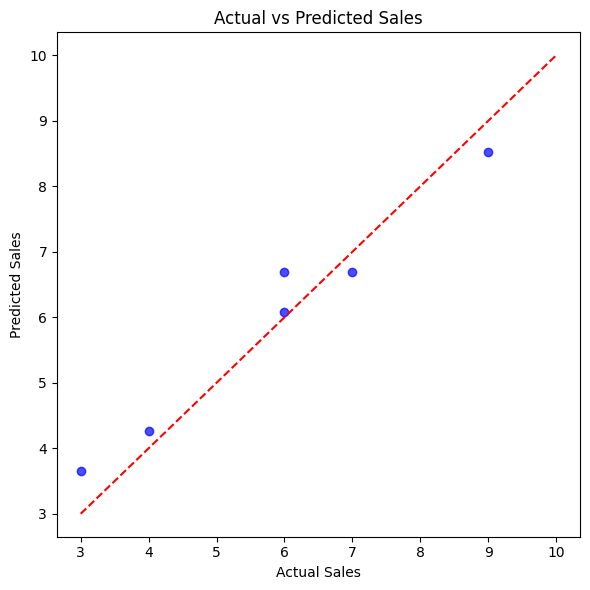

In [11]:

X = df[['Visitor Traffic']]
y = df['Sales Volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

if len(X.columns) == 1:
    model = LinearRegression()
else:
    model = DecisionTreeRegressor(random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.tight_layout()
plt.show()


### Model 3: Decision Tree (Price + Traffic)

R²: 0.9671532846715328
MAE: 0.25


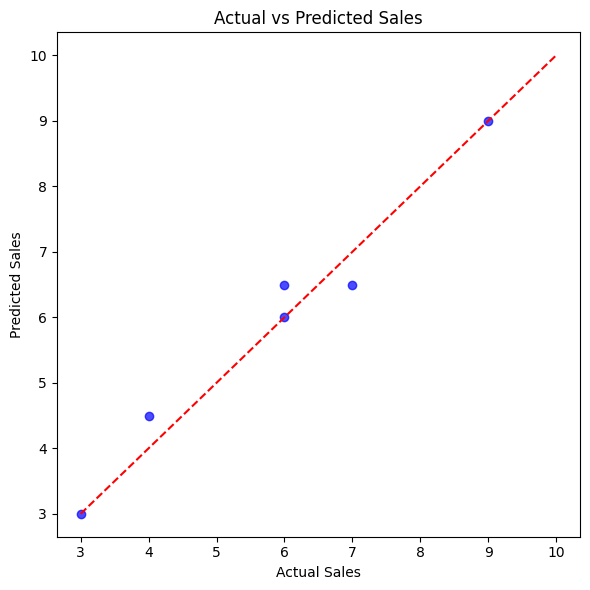

In [12]:

X = df[['Daily Price', 'Visitor Traffic']]
y = df['Sales Volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

if len(X.columns) == 1:
    model = LinearRegression()
else:
    model = DecisionTreeRegressor(random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.tight_layout()
plt.show()


### Model 4: Decision Tree (All Features)

R²: 0.8686131386861313
MAE: 0.5


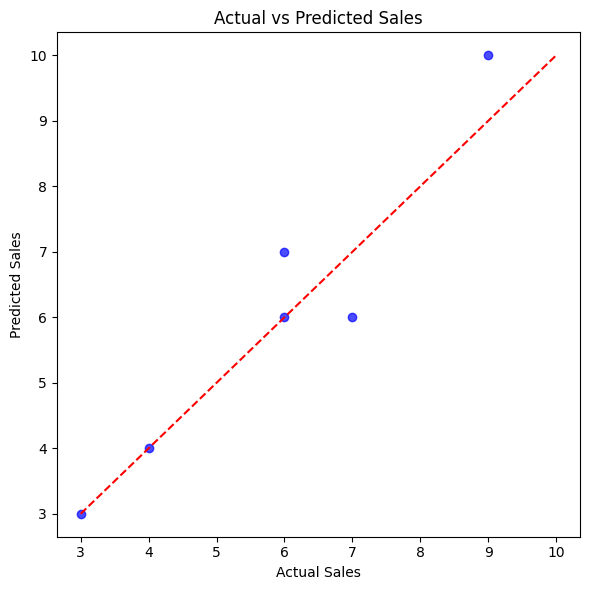

In [13]:

X = df[['Daily Price', 'Visitor Traffic', 'Promotion Status', 'Competitor Price']]
y = df['Sales Volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

if len(X.columns) == 1:
    model = LinearRegression()
else:
    model = DecisionTreeRegressor(random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.tight_layout()
plt.show()


## Conclusion


- **Optimal Price Range:** TL 315–330 leads to the highest sales.
- **Traffic Influence:** Visitor traffic is the strongest sales predictor.
- **Promotions:** Statistically significant increase in sales during promotions.
- **Machine Learning:** Decision Tree using Price + Traffic showed highest accuracy.

This study confirms the importance of data-driven pricing strategies for e-commerce performance.

---


## Feature Importance: Decision Tree Model


We evaluate the most influential features in our Decision Tree model (Model 4: using all features) to understand which variables contribute most to predicting sales volume.


<ipython-input-14-b8db579c44d9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fi_df, x='Importance', y='Feature', palette='Blues_d')


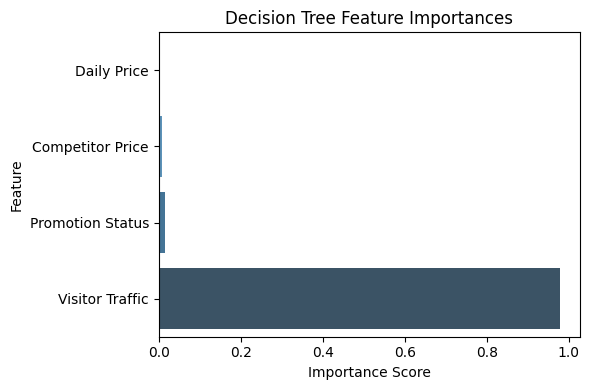

In [14]:

# Refit Model 4 to extract feature importances
from sklearn.tree import DecisionTreeRegressor
importances_model = DecisionTreeRegressor(random_state=42)
X = df[['Daily Price', 'Visitor Traffic', 'Promotion Status', 'Competitor Price']]
y = df['Sales Volume']

importances_model.fit(X, y)

importances = importances_model.feature_importances_
features = X.columns

# Plot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fi_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(6,4))
sns.barplot(data=fi_df, x='Importance', y='Feature', palette='Blues_d')
plt.title("Decision Tree Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
